# Predicting diabetes based on age, bmi, amount of sleep, drug usage, etc.

Source:
https://www.kaggle.com/datasets/tigganeha4/diabetes-dataset-2019

## Contents:

1. Data cleanup.
2. Data visualisation.
3. Data encoding.
4. Models creation and fitting.
5. Models comparison.
6. Neural networks.
7. Summary.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('diabetes_dataset__2019.csv')
data.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

There is a typo in 14th column. We will fix that.

In [5]:
data.rename(columns = {'Pregancies':'Pregnancies'}, inplace = True)

## Columns contents:

-- Age -- 

Values and count: 

less than 40    488
40-49           164
50-59           156
60 or older     144
Name: Age, dtype: int64
Number of nulls:  0 




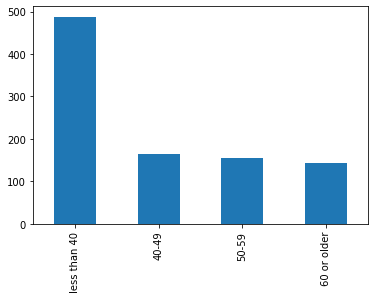

-- Gender -- 

Values and count: 

Male      580
Female    372
Name: Gender, dtype: int64
Number of nulls:  0 




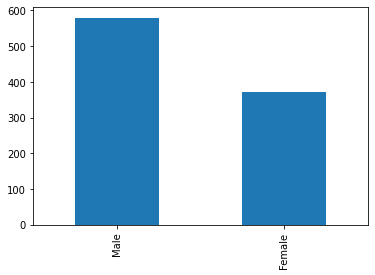

-- Family_Diabetes -- 

Values and count: 

no     498
yes    454
Name: Family_Diabetes, dtype: int64
Number of nulls:  0 




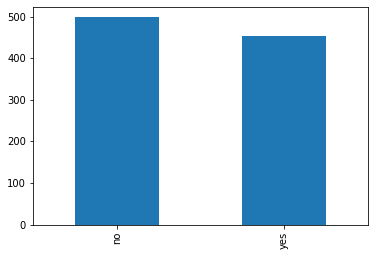

-- highBP -- 

Values and count: 

no     724
yes    228
Name: highBP, dtype: int64
Number of nulls:  0 




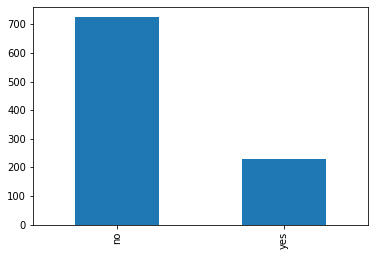

-- PhysicallyActive -- 

Values and count: 

less than half an hr    336
more than half an hr    272
one hr or more          212
none                    132
Name: PhysicallyActive, dtype: int64
Number of nulls:  0 




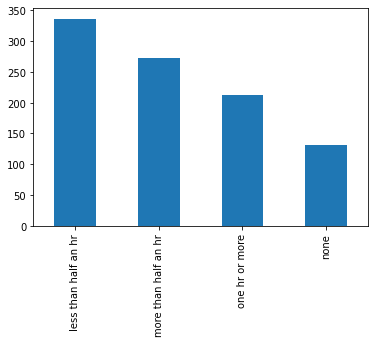

-- BMI -- 

Values and count: 

24.0    111
21.0     88
23.0     76
28.0     71
26.0     66
33.0     64
27.0     63
22.0     58
20.0     48
19.0     36
25.0     34
30.0     33
18.0     32
29.0     28
38.0     28
36.0     20
17.0     16
32.0     16
31.0     16
34.0     12
35.0     12
15.0      8
39.0      4
40.0      4
42.0      3
45.0      1
Name: BMI, dtype: int64
Number of nulls:  4 




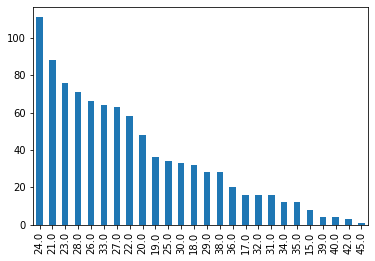

-- Smoking -- 

Values and count: 

no     844
yes    108
Name: Smoking, dtype: int64
Number of nulls:  0 




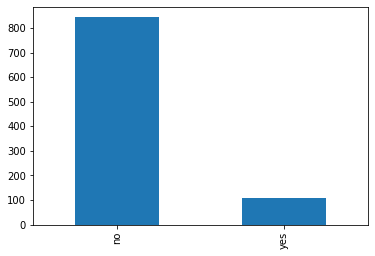

-- Alcohol -- 

Values and count: 

no     760
yes    192
Name: Alcohol, dtype: int64
Number of nulls:  0 




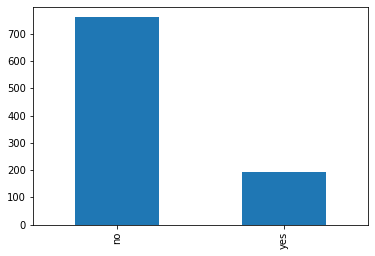

-- Sleep -- 

Values and count: 

7     264
8     256
6     256
5      68
9      48
4      32
10     24
11      4
Name: Sleep, dtype: int64
Number of nulls:  0 




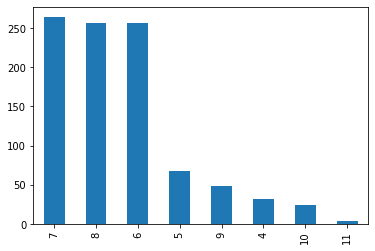

-- SoundSleep -- 

Values and count: 

6     228
4     188
5     156
8     120
7     104
3      68
2      44
10     16
9      16
11      4
1       4
0       4
Name: SoundSleep, dtype: int64
Number of nulls:  0 




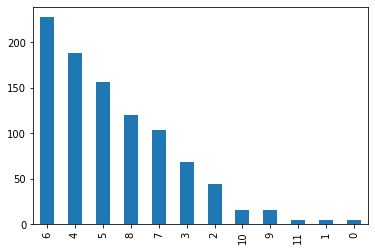

-- RegularMedicine -- 

Values and count: 

no     615
yes    336
o        1
Name: RegularMedicine, dtype: int64
Number of nulls:  0 




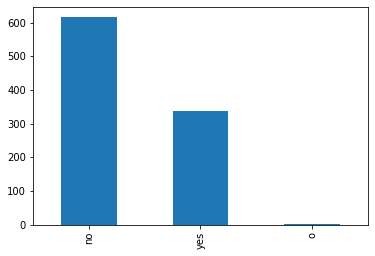

-- JunkFood -- 

Values and count: 

occasionally    672
often           184
very often       52
always           44
Name: JunkFood, dtype: int64
Number of nulls:  0 




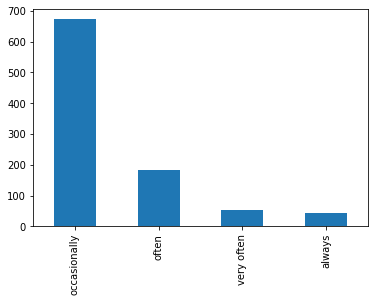

-- Stress -- 

Values and count: 

sometimes     564
very often    164
not at all    136
always         88
Name: Stress, dtype: int64
Number of nulls:  0 




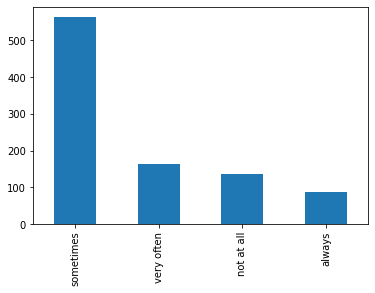

-- BPLevel -- 

Values and count: 

normal     707
high       211
low         25
High         5
Low          3
normal       1
Name: BPLevel, dtype: int64
Number of nulls:  0 




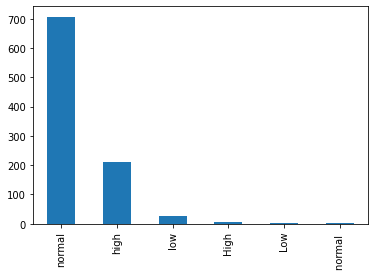

-- Pregnancies -- 

Values and count: 

0.0    754
2.0     64
3.0     60
1.0     28
4.0      4
Name: Pregnancies, dtype: int64
Number of nulls:  42 




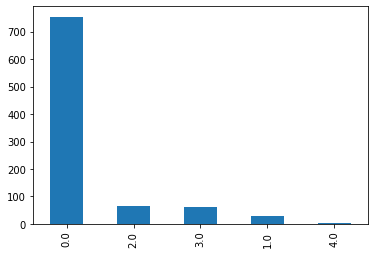

-- Pdiabetes -- 

Values and count: 

0      936
yes     14
no       1
Name: Pdiabetes, dtype: int64
Number of nulls:  1 




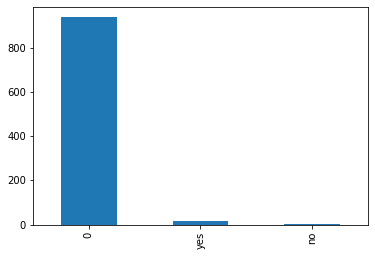

-- UriationFreq -- 

Values and count: 

not much       664
quite often    288
Name: UriationFreq, dtype: int64
Number of nulls:  0 




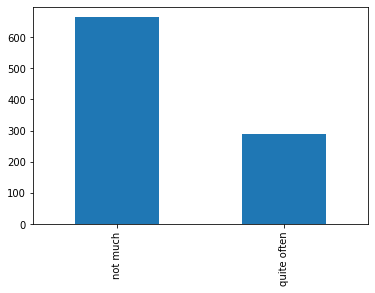

-- Diabetic -- 

Values and count: 

no     684
yes    266
 no      1
Name: Diabetic, dtype: int64
Number of nulls:  1 




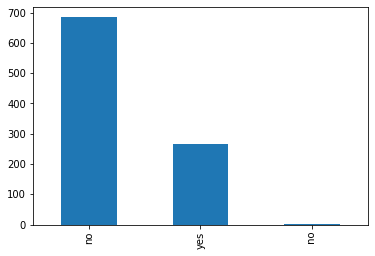

In [6]:
for column_name in data.columns:
    print('-- {} -- \n'.format(column_name))
    print('Values and count: \n')
    print(data[column_name].value_counts())
    print('Number of nulls: ', data[column_name].isnull().sum(), '\n\n')
    data[column_name].value_counts().plot(kind='bar')
    plt.show()

<AxesSubplot:>

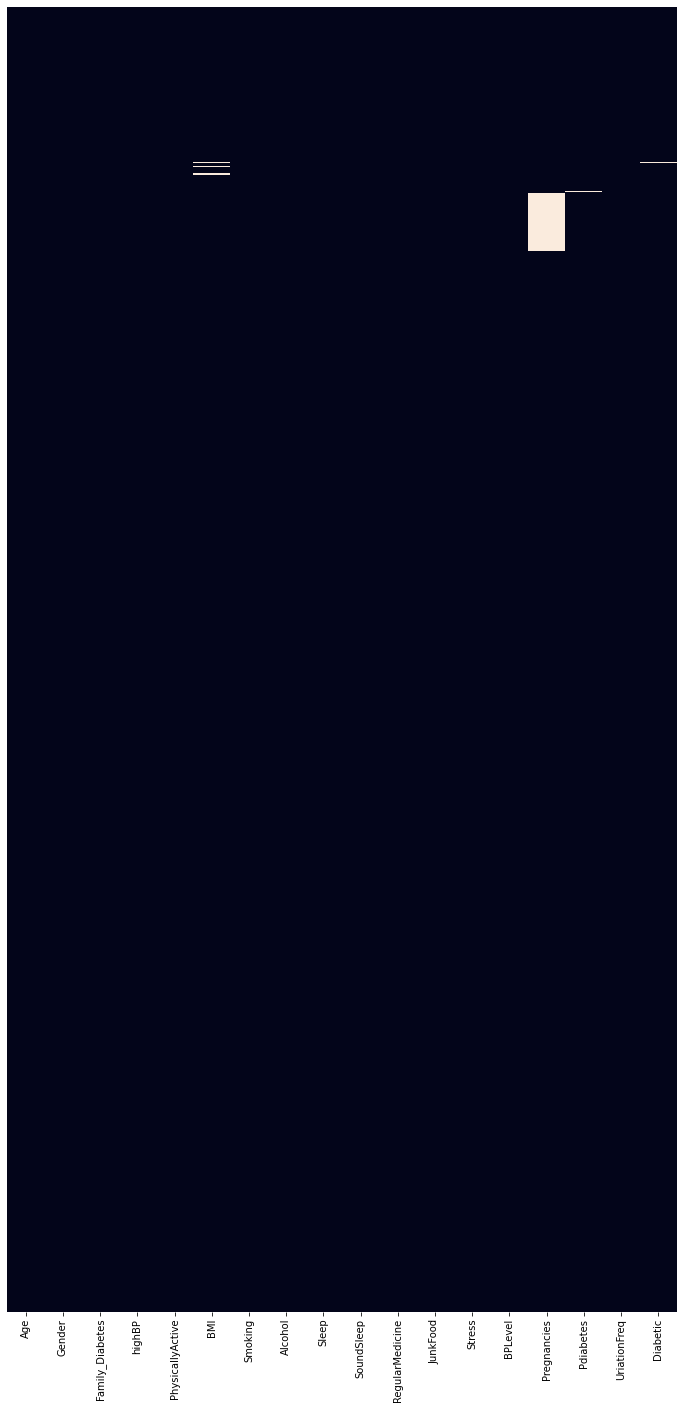

In [7]:
import seaborn as sns

plt.figure(figsize=(12, 24))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

## Data cleaning

We have one null value and one mistype in Diabetic column. Since we can't fix the null, we should drop it. We can fix the typo.

In [8]:
column_name = 'Diabetic'

data.loc[data[column_name] == ' no', column_name] = 'no'

print('-- {} -- \n'.format(column_name))
print('Values and count: \n')
print(data[column_name].value_counts())
print('Number of nulls: ', data[column_name].isnull().sum())

data.dropna(axis=0, subset=column_name, inplace=True)
print(data.shape)

-- Diabetic -- 

Values and count: 

no     685
yes    266
Name: Diabetic, dtype: int64
Number of nulls:  1
(951, 18)


Next we will be looking at PDiabetes. This column tells us whether a woman had gestational diabetes (diabetes diagnosed for the first time during pregnancy). This column has one null value as well as one mistyped label ('no' instead of '0').
I will change '0's to 'no's since that seems more natural.

In [9]:
column_name = 'Pdiabetes'

data.loc[data[column_name] == '0', column_name] = 'no'
data.loc[data[column_name].isnull(), column_name] = 'no'

print('-- {} -- \n'.format(column_name))
print('Values and count: \n')
print(data[column_name].value_counts())
print('Number of nulls: ', data[column_name].isnull().sum())

-- Pdiabetes -- 

Values and count: 

no     937
yes     14
Name: Pdiabetes, dtype: int64
Number of nulls:  0


Now let's fix missing data in pregnancies. We can assume that if no data is present that means no pregnancy occurred.

In [10]:
column_name = 'Pregnancies'

data.loc[data[column_name].isnull(), column_name] = 0.0

print('-- {} -- \n'.format(column_name))
print('Values and count: \n')
print(data[column_name].value_counts())
print('Number of nulls: ', data[column_name].isnull().sum())

-- Pregnancies -- 

Values and count: 

0.0    795
2.0     64
3.0     60
1.0     28
4.0      4
Name: Pregnancies, dtype: int64
Number of nulls:  0


BPLevel can be improved.

In [11]:
column_name = 'BPLevel'

print('-- {} -- \n'.format(column_name))

print('Values and count: \n')
print(data[column_name].value_counts())
print('Number of nulls: ', data[column_name].isnull().sum())

data.loc[data[column_name] == 'normal ', column_name] = 'normal'
data.loc[data[column_name] == 'High', column_name] = 'high'
data.loc[data[column_name] == 'Low', column_name] = 'low'

print('Values and count: \n')
print(data[column_name].value_counts())
print('Number of nulls: ', data[column_name].isnull().sum())

-- BPLevel -- 

Values and count: 

normal     706
high       211
low         25
High         5
Low          3
normal       1
Name: BPLevel, dtype: int64
Number of nulls:  0
Values and count: 

normal    707
high      216
low        28
Name: BPLevel, dtype: int64
Number of nulls:  0


RegularMedicine has one mistyped field. 'o' instead of 'no'. We will fix that.

In [12]:
column_name = 'RegularMedicine'

data.loc[data[column_name] == 'o', column_name] = 'no'

print('-- {} -- \n'.format(column_name))
print('Values and count: \n')
print(data[column_name].value_counts())
print('Number of nulls: ', data[column_name].isnull().sum())

-- RegularMedicine -- 

Values and count: 

no     615
yes    336
Name: RegularMedicine, dtype: int64
Number of nulls:  0


BMI has 4 nulls. We can just fill it with average BMI.

In [13]:
column_name = 'BMI'

# male = data.loc[(data['Gender'] == 'Male'), column_name]
# male_sum = male.sum()
# male_count = male.count()
# male_avg = round(male_sum/male_count)
# print(male_avg)

# female = data.loc[(data['Gender'] == 'Female'), column_name]
# female_sum = female.sum()
# female_count = female.count()
# female_avg = round(female_sum/female_count)
# print(female_avg)

# data.loc[(data[column_name].isnull() & data['Gender'] == 'Male'), column_name] = male_avg
# data.loc[(data[column_name].isnull() & data['Gender'] == 'Female'), column_name] = female_avg


mean = round(data[column_name].describe()['mean'])
print('Mean BMI: ', mean)

print('-- {} -- \n'.format(column_name))
print('Values and count: \n')
print(data[column_name].value_counts())
print('Number of nulls: ', data[column_name].isnull().sum())

data.loc[data[column_name].isnull(), column_name] = mean

print('Values and count: \n')
print(data[column_name].value_counts())
print('Number of nulls: ', data[column_name].isnull().sum())

Mean BMI:  26
-- BMI -- 

Values and count: 

24.0    111
21.0     88
23.0     76
28.0     71
26.0     66
33.0     64
27.0     63
22.0     58
20.0     48
19.0     36
25.0     34
30.0     33
18.0     32
29.0     28
38.0     28
36.0     20
17.0     16
32.0     16
31.0     16
34.0     12
35.0     12
15.0      8
39.0      4
40.0      4
42.0      3
45.0      1
Name: BMI, dtype: int64
Number of nulls:  3
Values and count: 

24.0    111
21.0     88
23.0     76
28.0     71
26.0     69
33.0     64
27.0     63
22.0     58
20.0     48
19.0     36
25.0     34
30.0     33
18.0     32
29.0     28
38.0     28
36.0     20
17.0     16
32.0     16
31.0     16
34.0     12
35.0     12
15.0      8
39.0      4
40.0      4
42.0      3
45.0      1
Name: BMI, dtype: int64
Number of nulls:  0


## Data visualization

### Diabetic or not

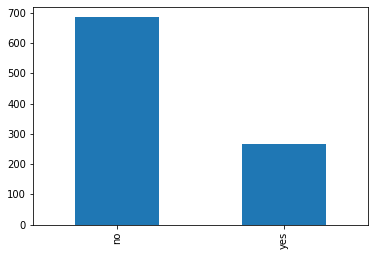

In [14]:
data['Diabetic'].value_counts().plot(kind='bar')
plt.show()

## Data encoding

In [16]:
data['Age'] = data['Age'].map({'less than 40':0,
                                '40-49':1,
                                '50-59':2,
                                '60 or older':3},
                               na_action='ignore')

In [17]:
data['Gender'] = data['Gender'].map({'Male':0,
                                'Female':1},
                               na_action='ignore')

In [18]:
no_yes_map = {'no':0, 'yes':1}

data['Family_Diabetes'] = data['Family_Diabetes'].map(no_yes_map,
                               na_action='ignore')
data['highBP'] = data['highBP'].map(no_yes_map,
                               na_action='ignore')
data['Smoking'] = data['Smoking'].map(no_yes_map,
                               na_action='ignore')
data['Alcohol'] = data['Alcohol'].map(no_yes_map,
                               na_action='ignore')
data['RegularMedicine'] = data['RegularMedicine'].map(no_yes_map,
                               na_action='ignore')
data['Pdiabetes'] = data['Pdiabetes'].map(no_yes_map,
                               na_action='ignore')
data['Diabetic'] = data['Diabetic'].map(no_yes_map,
                               na_action='ignore')

In [19]:
data['PhysicallyActive'] = data['PhysicallyActive'].map({'none':0,
                                'less than half an hr':1,
                                'more than half an hr':2,
                                'one hr or more':3},
                               na_action='ignore')

In [20]:
data['JunkFood'] = data['JunkFood'].map({'occasionally':0,
                                'often':1,
                                'very often':2,
                                'always':3},
                               na_action='ignore')

In [21]:
data['Stress'] = data['Stress'].map({'not at all':0,
                                'sometimes':1,
                                'very often':2,
                                'always':3},
                               na_action='ignore')

In [22]:
data['BPLevel'] = data['BPLevel'].map({'low':0,
                                'normal':1,
                                'high':2},
                               na_action='ignore')

In [23]:
data['UriationFreq'] = data['UriationFreq'].map({'not much':0,
                                'quite often':1},
                               na_action='ignore')

-- Age -- 

Values and count: 

0    487
1    164
2    156
3    144
Name: Age, dtype: int64
Number of nulls:  0 




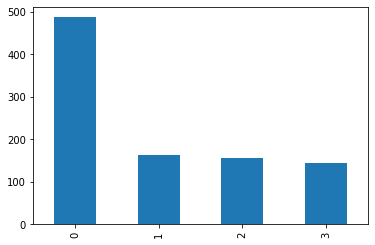

-- Gender -- 

Values and count: 

0    580
1    371
Name: Gender, dtype: int64
Number of nulls:  0 




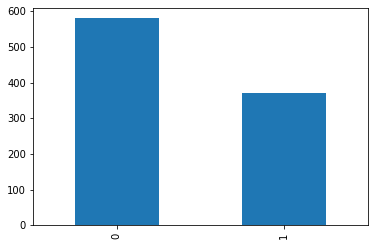

-- Family_Diabetes -- 

Values and count: 

0    498
1    453
Name: Family_Diabetes, dtype: int64
Number of nulls:  0 




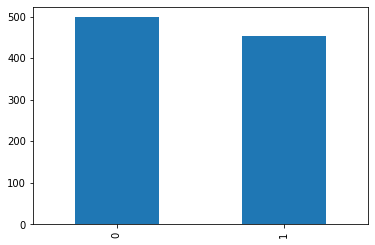

-- highBP -- 

Values and count: 

0    723
1    228
Name: highBP, dtype: int64
Number of nulls:  0 




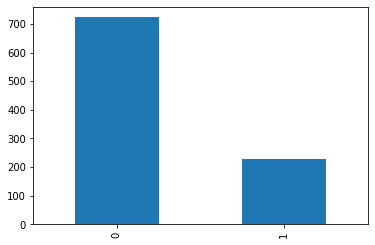

-- PhysicallyActive -- 

Values and count: 

1    336
2    271
3    212
0    132
Name: PhysicallyActive, dtype: int64
Number of nulls:  0 




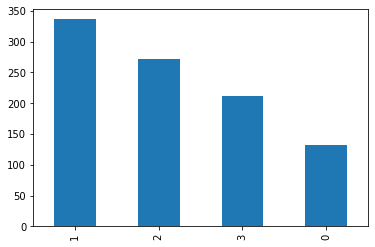

-- BMI -- 

Values and count: 

24.0    111
21.0     88
23.0     76
28.0     71
26.0     69
33.0     64
27.0     63
22.0     58
20.0     48
19.0     36
25.0     34
30.0     33
18.0     32
29.0     28
38.0     28
36.0     20
17.0     16
32.0     16
31.0     16
34.0     12
35.0     12
15.0      8
39.0      4
40.0      4
42.0      3
45.0      1
Name: BMI, dtype: int64
Number of nulls:  0 




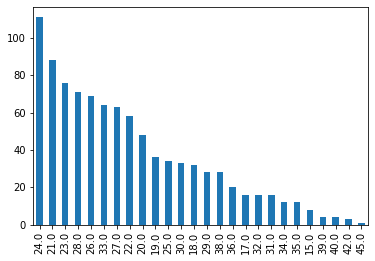

-- Smoking -- 

Values and count: 

0    843
1    108
Name: Smoking, dtype: int64
Number of nulls:  0 




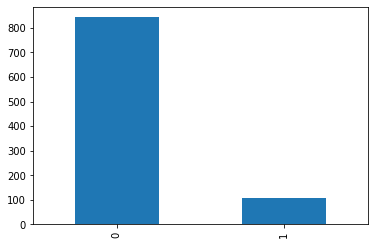

-- Alcohol -- 

Values and count: 

0    759
1    192
Name: Alcohol, dtype: int64
Number of nulls:  0 




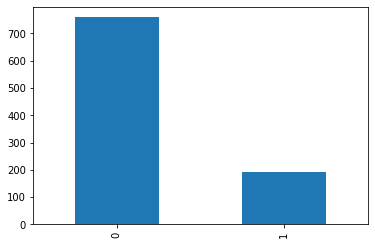

-- Sleep -- 

Values and count: 

7     263
8     256
6     256
5      68
9      48
4      32
10     24
11      4
Name: Sleep, dtype: int64
Number of nulls:  0 




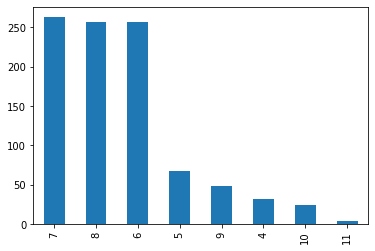

-- SoundSleep -- 

Values and count: 

6     227
4     188
5     156
8     120
7     104
3      68
2      44
10     16
9      16
11      4
1       4
0       4
Name: SoundSleep, dtype: int64
Number of nulls:  0 




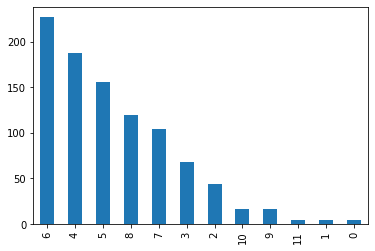

-- RegularMedicine -- 

Values and count: 

0    615
1    336
Name: RegularMedicine, dtype: int64
Number of nulls:  0 




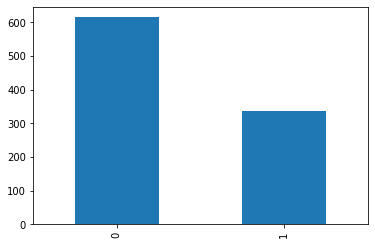

-- JunkFood -- 

Values and count: 

0    671
1    184
2     52
3     44
Name: JunkFood, dtype: int64
Number of nulls:  0 




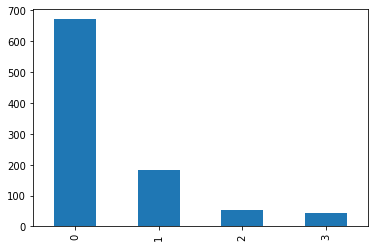

-- Stress -- 

Values and count: 

1    564
2    164
0    135
3     88
Name: Stress, dtype: int64
Number of nulls:  0 




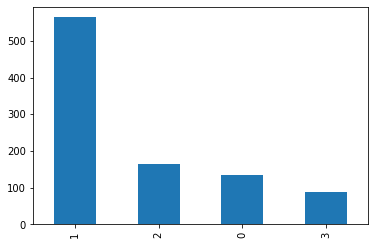

-- BPLevel -- 

Values and count: 

1    707
2    216
0     28
Name: BPLevel, dtype: int64
Number of nulls:  0 




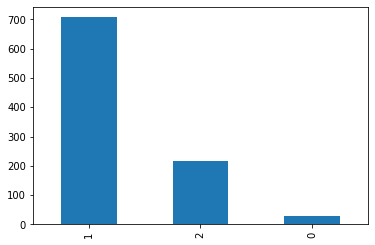

-- Pregnancies -- 

Values and count: 

0.0    795
2.0     64
3.0     60
1.0     28
4.0      4
Name: Pregnancies, dtype: int64
Number of nulls:  0 




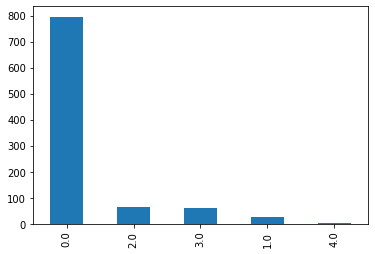

-- Pdiabetes -- 

Values and count: 

0    937
1     14
Name: Pdiabetes, dtype: int64
Number of nulls:  0 




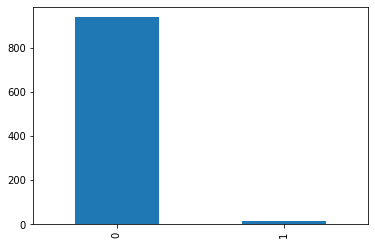

-- UriationFreq -- 

Values and count: 

0    663
1    288
Name: UriationFreq, dtype: int64
Number of nulls:  0 




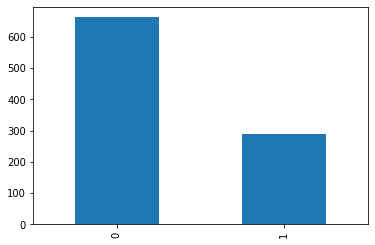

-- Diabetic -- 

Values and count: 

0    685
1    266
Name: Diabetic, dtype: int64
Number of nulls:  0 




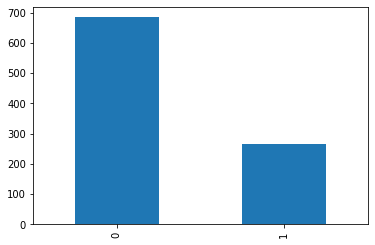

In [24]:
for column_name in data.columns:
    print('-- {} -- \n'.format(column_name))
    print('Values and count: \n')
    print(data[column_name].value_counts())
    print('Number of nulls: ', data[column_name].isnull().sum(), '\n\n')
    data[column_name].value_counts().plot(kind='bar')
    plt.show()

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               951 non-null    int64  
 1   Gender            951 non-null    int64  
 2   Family_Diabetes   951 non-null    int64  
 3   highBP            951 non-null    int64  
 4   PhysicallyActive  951 non-null    int64  
 5   BMI               951 non-null    float64
 6   Smoking           951 non-null    int64  
 7   Alcohol           951 non-null    int64  
 8   Sleep             951 non-null    int64  
 9   SoundSleep        951 non-null    int64  
 10  RegularMedicine   951 non-null    int64  
 11  JunkFood          951 non-null    int64  
 12  Stress            951 non-null    int64  
 13  BPLevel           951 non-null    int64  
 14  Pregnancies       951 non-null    float64
 15  Pdiabetes         951 non-null    int64  
 16  UriationFreq      951 non-null    int64  
 1

## Data correlation visualization

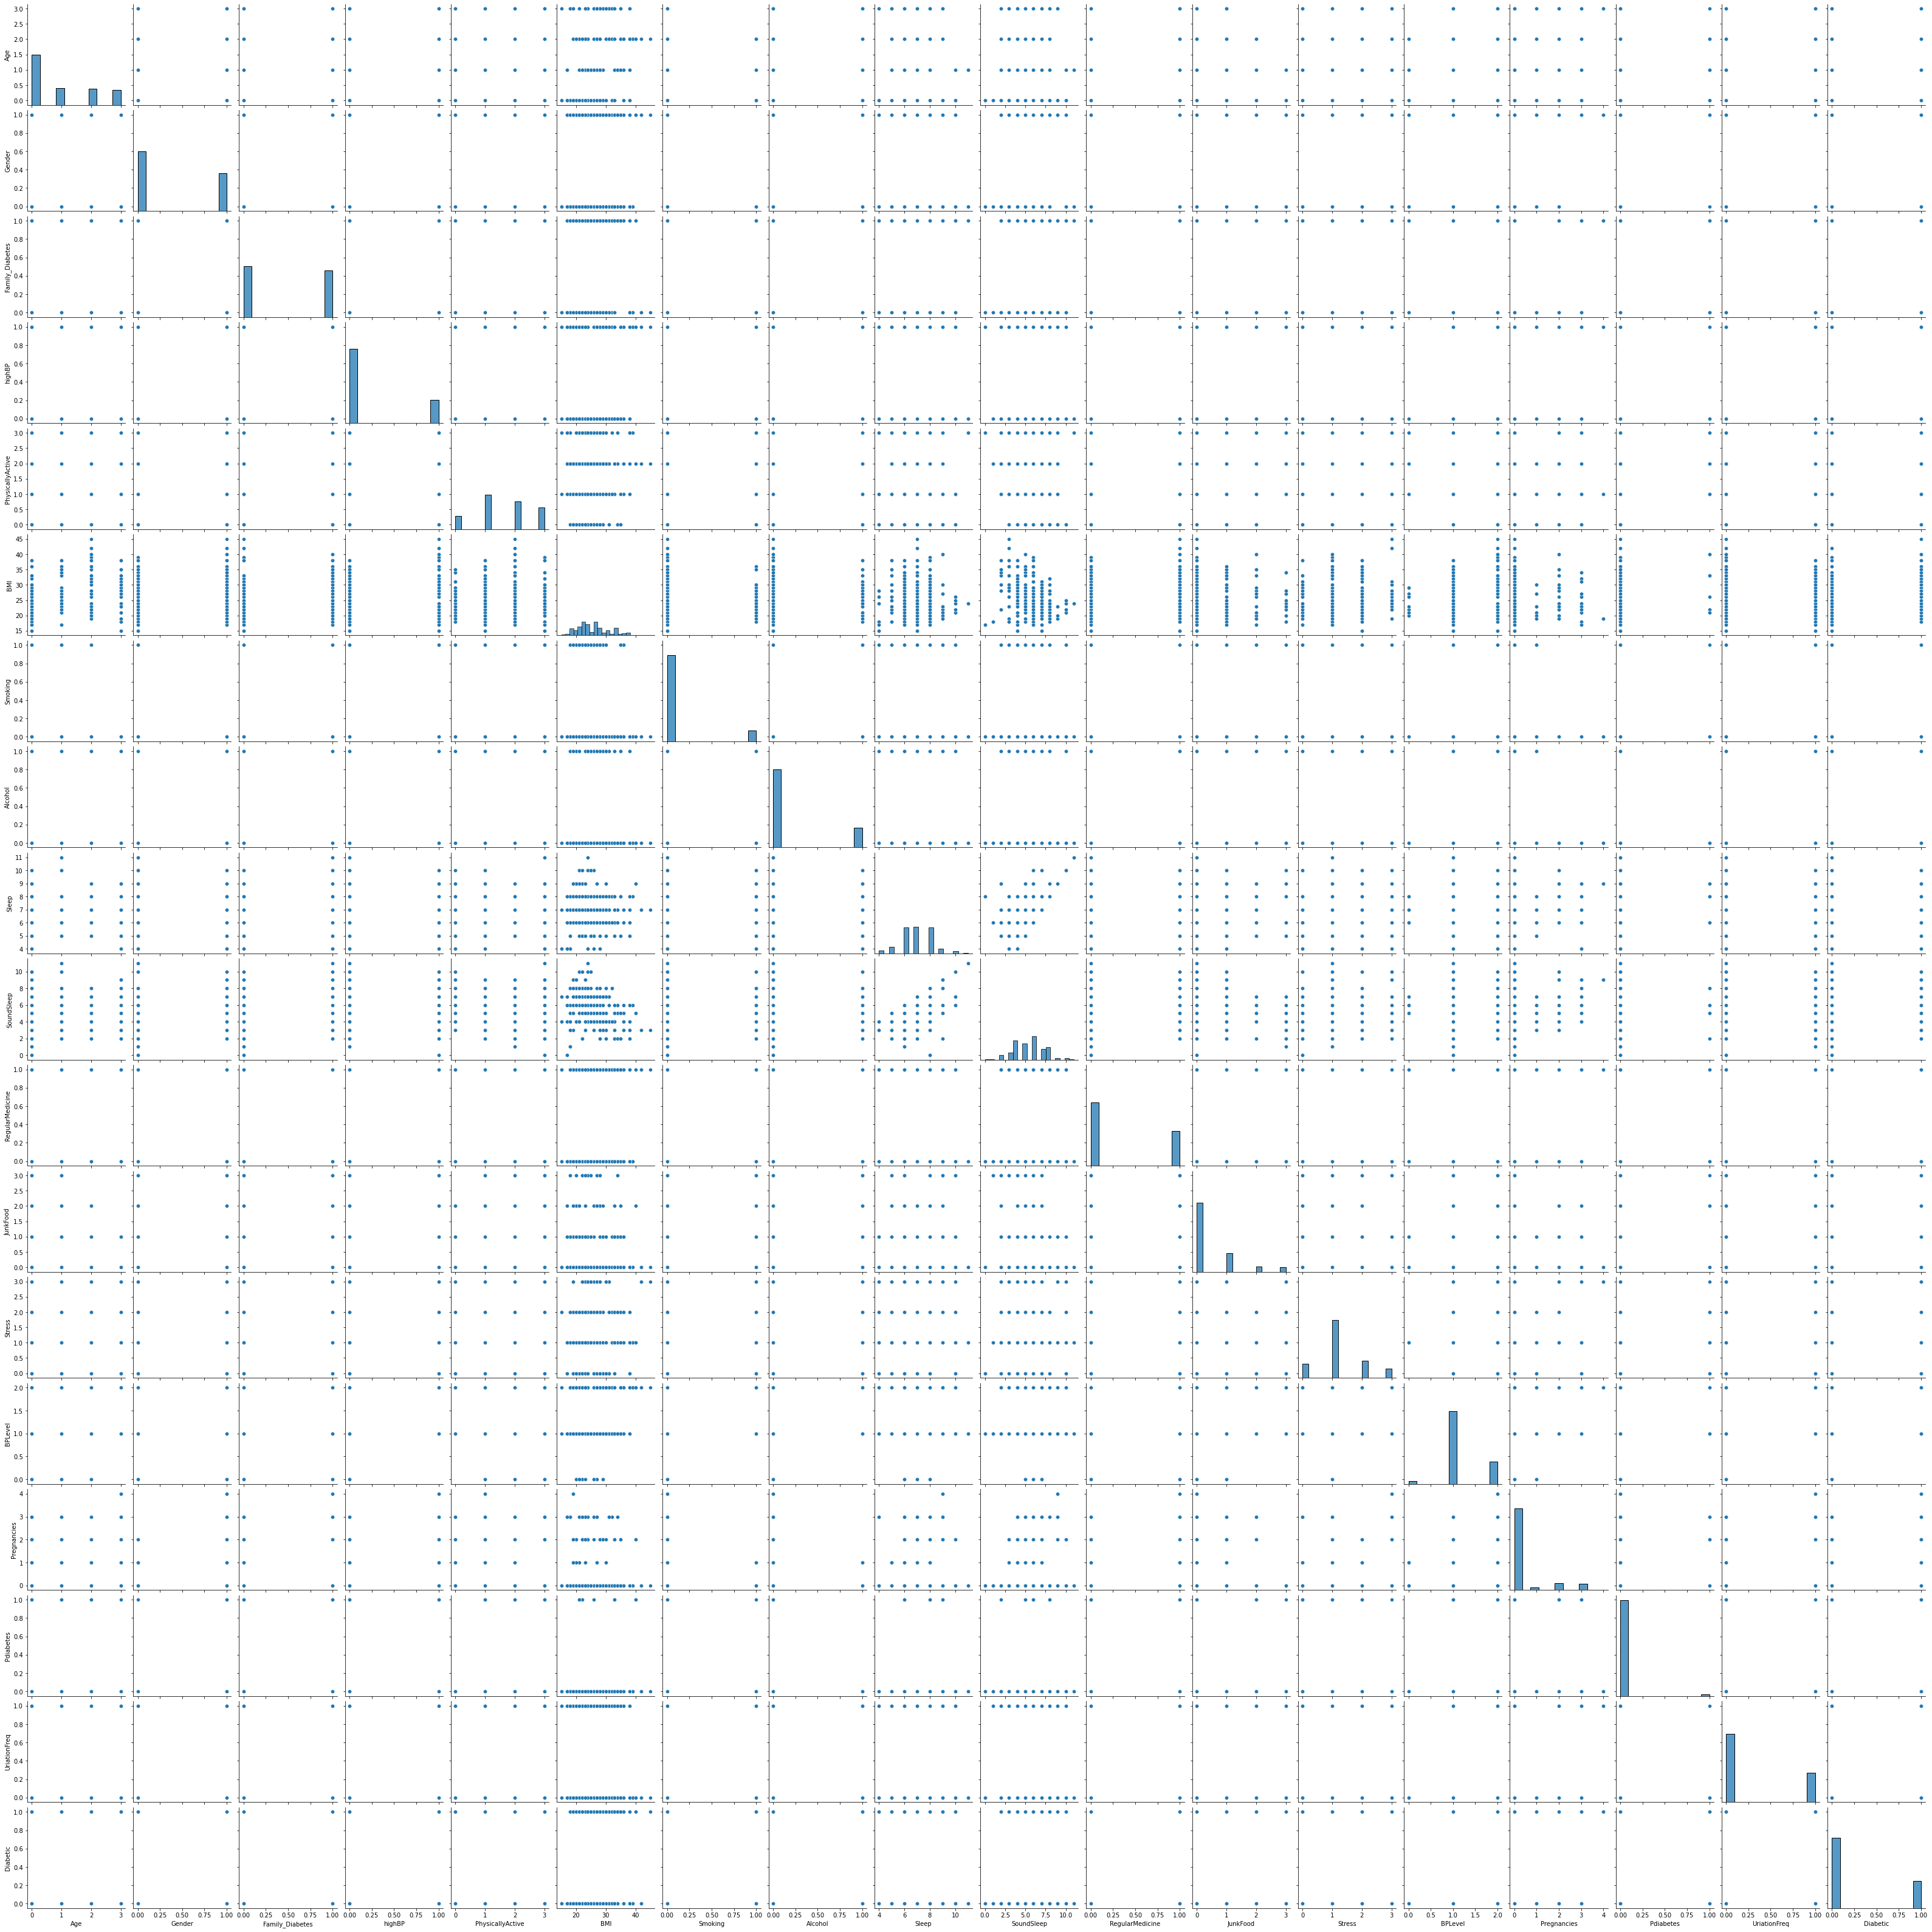

In [26]:
import seaborn as sns

sns.pairplot(data)
plt.show()

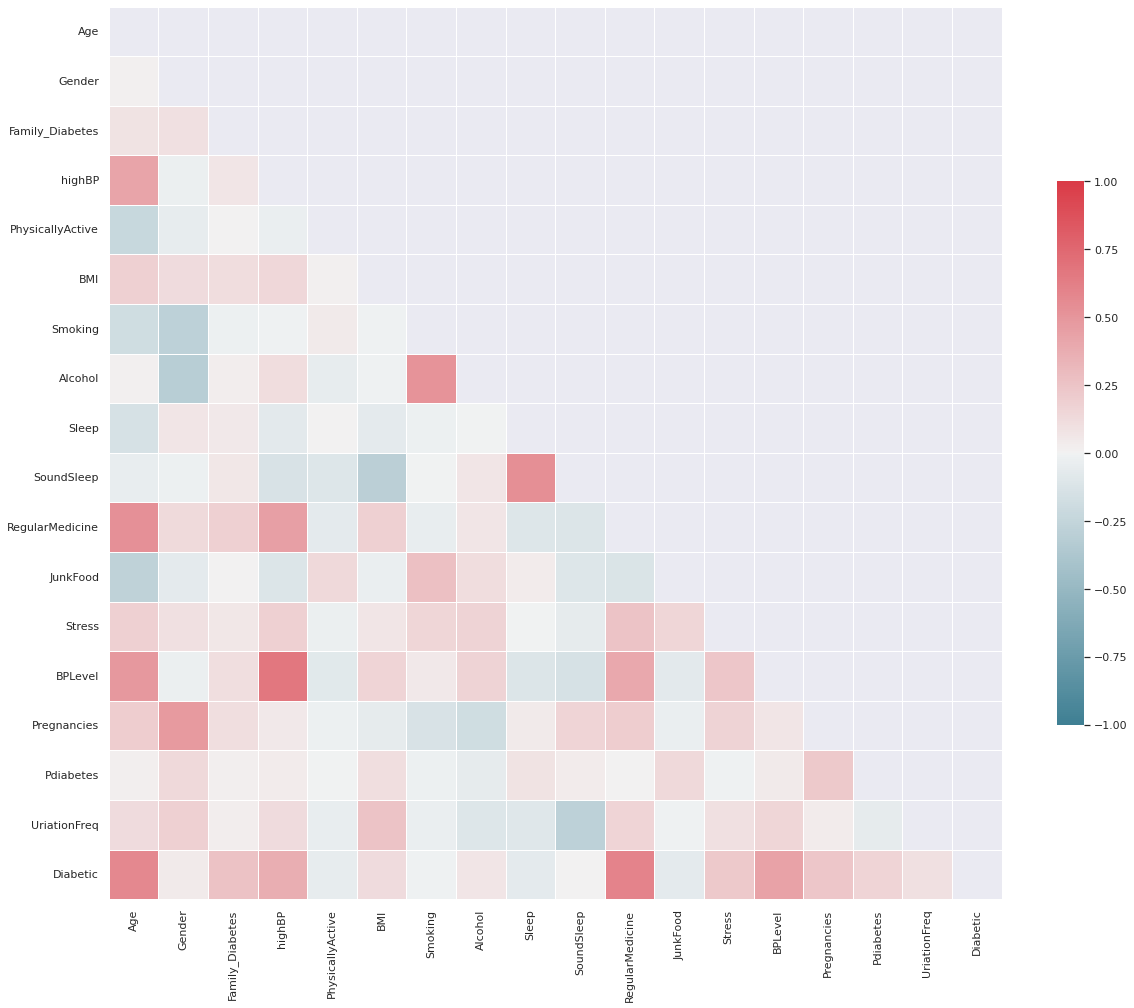

In [27]:
sns.set(style="darkgrid")

corr = data.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=1, yticklabels=1,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

In [28]:
corr

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregnancies,Pdiabetes,UriationFreq,Diabetic
Age,1.000000,0.011005,0.084648,0.423050,-0.228555,0.181355,-0.184907,0.010840,-0.141757,-0.040709,0.527358,-0.276776,0.186496,0.487318,0.199850,0.020321,0.123444,0.571612
Gender,0.011005,1.000000,0.096158,-0.024976,-0.054062,0.119713,-0.286267,-0.316329,0.065570,-0.019349,0.130433,-0.064591,0.099925,-0.024692,0.479833,0.134935,0.186009,0.039523
Family_Diabetes,0.084648,0.096158,1.000000,0.066054,0.006044,0.114697,-0.022859,0.029071,0.049385,0.057155,0.184772,0.007768,0.061545,0.105857,0.104557,0.023272,0.031222,0.259360
highBP,0.423050,-0.024976,0.066054,1.000000,-0.037554,0.147428,-0.014693,0.110251,-0.070594,-0.133242,0.450579,-0.113545,0.181462,0.670343,0.054107,0.033612,0.123034,0.374382
PhysicallyActive,-0.228555,-0.054062,0.006044,-0.037554,1.000000,0.008857,0.040698,-0.047108,0.003713,-0.105483,-0.069231,0.133618,-0.027286,-0.081018,-0.019652,-0.002561,-0.043094,-0.048827
BMI,0.181355,0.119713,0.114697,0.147428,0.008857,1.000000,-0.008951,-0.009123,-0.067911,-0.297765,0.183269,-0.036529,0.066973,0.159461,-0.061858,0.104129,0.256317,0.124561
Smoking,-0.184907,-0.286267,-0.022859,-0.014693,0.040698,-0.008951,1.000000,0.513503,-0.017047,-0.002645,-0.042694,0.267739,0.152346,0.047257,-0.133570,-0.016233,-0.033948,-0.008921
Alcohol,0.010840,-0.316329,0.029071,0.110251,-0.047108,-0.009123,0.513503,1.000000,-0.004751,0.068676,0.066662,0.115862,0.165976,0.168759,-0.185082,-0.061479,-0.103446,0.065928
Sleep,-0.141757,0.065570,0.049385,-0.070594,0.003713,-0.067911,-0.017047,-0.004751,1.000000,0.534695,-0.102013,0.038598,-0.001709,-0.110704,0.042346,0.080280,-0.096098,-0.065457
SoundSleep,-0.040709,-0.019349,0.057155,-0.133242,-0.105483,-0.297765,-0.002645,0.068676,0.534695,1.000000,-0.116045,-0.101982,-0.059647,-0.146377,0.157656,0.033071,-0.282924,0.001581


## Data splitting

In [29]:
from sklearn.model_selection import train_test_split

X = data.loc[:, data.columns != "Diabetic"]
y = data["Diabetic"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(760, 17) (760,)
(191, 17) (191,)


In [30]:
X_train.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregnancies,Pdiabetes,UriationFreq
319,3,0,0,0,2,24.0,0,0,7,7,0,0,1,1,0.0,0,1
546,3,1,1,1,1,18.0,0,0,4,3,1,0,1,2,0.0,0,0
558,0,1,0,0,1,17.0,0,0,4,4,0,0,1,1,0.0,0,1
109,0,1,1,0,3,24.0,0,0,8,8,0,1,1,1,0.0,0,0
77,2,1,0,1,0,20.0,0,0,7,4,1,0,1,2,1.0,0,0


In [31]:
y_train.head()

319    1
546    1
558    0
109    0
77     1
Name: Diabetic, dtype: int64

# Creating models

## List of models:
* Logistic regression
* SVC rbf
* SVC poly
* SVC linear
* K neighbours
* Decision tree
* Random forest
* Bagging
* Ada boost
* Gradient boosting
* XGBC
* XGBC randomized search

In [32]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()

    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

In [33]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

from xgboost import XGBClassifier

from scipy.stats.distributions import uniform, randint

In [34]:
seed = 123
kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

model_name_pairs = []

In [36]:
pipeline_log_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='saga'))
])

param_grid_log_reg = {
            'scaler': [StandardScaler(), None],
            'classifier__C': [1e-4, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 1e+4, 1e+5],
            'classifier__penalty': ['l1', 'l2', 'none']
}
grid_log_reg = GridSearchCV(pipeline_log_reg, param_grid_log_reg, cv=kfold, return_train_score=True)
grid_log_reg.fit(X_train, y_train)
print(grid_log_reg.best_params_)

model_name_pairs.append((grid_log_reg, 'Logistic Regression'))

{'classifier__C': 0.1, 'classifier__penalty': 'l1', 'scaler': StandardScaler()}


In [37]:
# results = pd.DataFrame(grid_log_reg.cv_results_)

# print(np.array(results.param_classifier__C).reshape(
#     len(param_grid_log_reg['classifier__C']),
#     len(param_grid_log_reg['classifier__penalty']),
#     2)[:,:,0])

# print(np.array(results.param_classifier__penalty).reshape(
#     len(param_grid_log_reg['classifier__C']),
#     len(param_grid_log_reg['classifier__penalty']),
#     2)[:,:,0])

# print(np.array(results.param_scaler).reshape(
#     len(param_grid_log_reg['classifier__C']),
#     len(param_grid_log_reg['classifier__penalty']),
#     2)[:,:,0])

Scaled


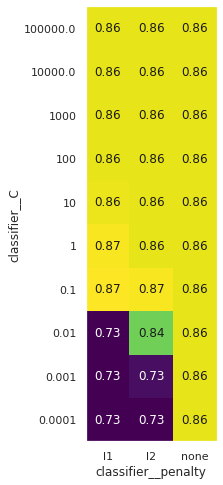

Unscaled


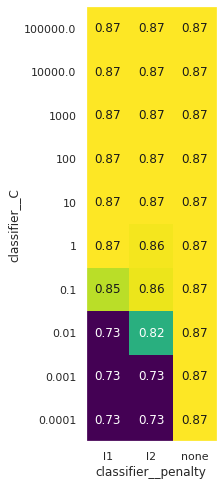

In [38]:
results = pd.DataFrame(grid_log_reg.cv_results_)

scores = np.array(results.mean_test_score).reshape(
    len(param_grid_log_reg['classifier__C']),
    len(param_grid_log_reg['classifier__penalty']),
    2)[:,:,0]

print('Scaled')
plt.figure(figsize=(8,8))
heatmap(scores,
        xlabel='classifier__penalty',
        xticklabels=param_grid_log_reg['classifier__penalty'], 
        ylabel='classifier__C', 
        yticklabels=param_grid_log_reg['classifier__C'],
        cmap="viridis")
plt.show()

scores = np.array(results.mean_test_score).reshape(
    len(param_grid_log_reg['classifier__C']),
    len(param_grid_log_reg['classifier__penalty']),
    2)[:,:,1]

print('Unscaled')
plt.figure(figsize=(8,8))
heatmap(scores,
        xlabel='classifier__penalty',
        xticklabels=param_grid_log_reg['classifier__penalty'], 
        ylabel='classifier__C', 
        yticklabels=param_grid_log_reg['classifier__C'],
        cmap="viridis")
plt.show()

In [39]:
pipeline_svc_rbf = Pipeline([('scaler', StandardScaler()), ('classifier', SVC(kernel='rbf'))])

param_grid_svc_rbf = {
            'scaler': [StandardScaler(), None],
            'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__C': [0.1, 1, 10, 100, 1000, 10000]
}

grid_svc_rbf = GridSearchCV(pipeline_svc_rbf, param_grid_svc_rbf, cv=kfold, return_train_score=True)

grid_svc_rbf.fit(X_train, y_train)
print(grid_svc_rbf.best_params_)

model_name_pairs.append((grid_svc_rbf, 'SVC rbf'))

{'classifier__C': 100, 'classifier__gamma': 0.1, 'scaler': None}


In [40]:
# results = pd.DataFrame(grid_svc_rbf.cv_results_)

# print(np.array(results.param_classifier__C).reshape(
#     len(param_grid_svc_rbf['classifier__C']),
#     len(param_grid_svc_rbf['classifier__gamma']),
#     2)[:,:,0])

# print(np.array(results.param_classifier__gamma).reshape(
#     len(param_grid_svc_rbf['classifier__C']),
#     len(param_grid_svc_rbf['classifier__gamma']),
#     2)[:,:,0])

# print(np.array(results.param_scaler).reshape(
#     len(param_grid_svc_rbf['classifier__C']),
#     len(param_grid_svc_rbf['classifier__gamma']),
#     2)[:,:,0])

Scaled


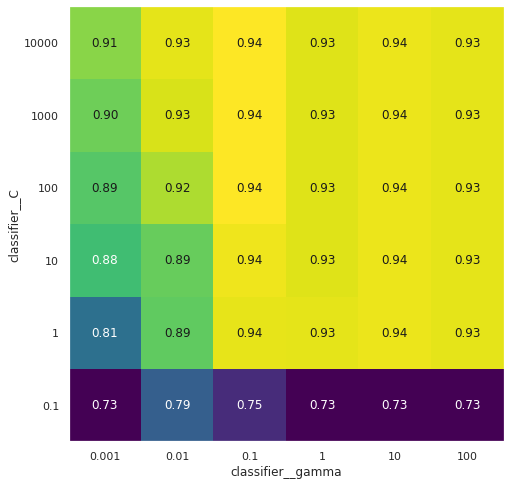

Unscaled


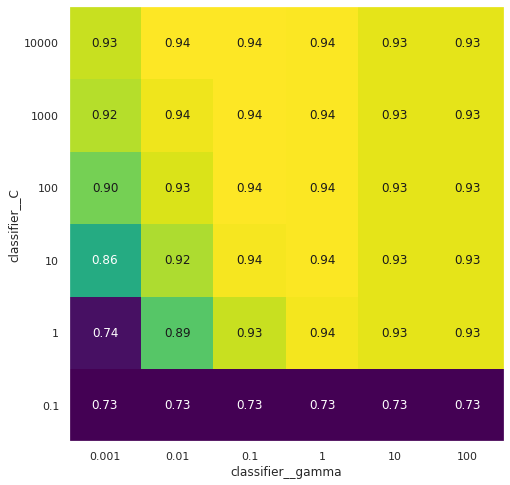

In [41]:
results = pd.DataFrame(grid_svc_rbf.cv_results_)

scores = np.array(results.mean_test_score).reshape(
    len(param_grid_svc_rbf['classifier__C']),
    len(param_grid_svc_rbf['classifier__gamma']),
    2)

print('Scaled')
plt.figure(figsize=(8,8))
heatmap(scores[:,:,0],
        xlabel='classifier__gamma',
        xticklabels=param_grid_svc_rbf['classifier__gamma'], 
        ylabel='classifier__C', 
        yticklabels=param_grid_svc_rbf['classifier__C'],
        cmap="viridis")
plt.show()

print('Unscaled')
plt.figure(figsize=(8,8))
heatmap(scores[:,:,1],
        xlabel='classifier__gamma',
        xticklabels=param_grid_svc_rbf['classifier__gamma'], 
        ylabel='classifier__C', 
        yticklabels=param_grid_svc_rbf['classifier__C'],
        cmap="viridis")
plt.show()

In [42]:
pipeline_svc_poly = Pipeline([('scaler', StandardScaler()), ('classifier', SVC(kernel='poly'))])

param_grid_svc_poly = {
            'scaler': [StandardScaler(), None],
            'classifier__degree': [1, 2, 3, 4, 5, 6],
            'classifier__coef0': [0, 1],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_svc_poly = GridSearchCV(pipeline_svc_poly, param_grid_svc_poly, cv=kfold, return_train_score=True)

grid_svc_poly.fit(X_train, y_train)
print(grid_svc_poly.best_params_)

model_name_pairs.append((grid_svc_poly, 'SVC poly'))

{'classifier__C': 0.1, 'classifier__coef0': 1, 'classifier__degree': 6, 'scaler': StandardScaler()}


In [43]:
pipeline_svc_lin = Pipeline([('scaler', StandardScaler()), ('classifier', SVC(kernel='linear'))])

param_grid_svc_lin = {
            'scaler': [StandardScaler(), None],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_svc_lin = GridSearchCV(pipeline_svc_lin, param_grid_svc_lin, cv=kfold, return_train_score=True)

grid_svc_lin.fit(X_train, y_train)
print(grid_svc_lin.best_params_)

model_name_pairs.append((grid_svc_lin, 'SVC linear'))

{'classifier__C': 1, 'scaler': StandardScaler()}


In [44]:
pipeline_k_neigh = Pipeline([('scaler', StandardScaler()), ('classifier', KNeighborsClassifier())])

param_grid_k_neigh = {
            'scaler': [StandardScaler(), None],
            'classifier__p': [1, 10, 100, 1000, 10000]
}

grid_k_neigh = GridSearchCV(pipeline_k_neigh, param_grid_k_neigh, cv=kfold, return_train_score=True)

grid_k_neigh.fit(X_train, y_train)
print(grid_k_neigh.best_params_)

model_name_pairs.append((grid_k_neigh, 'K neighbours'))

{'classifier__p': 10, 'scaler': StandardScaler()}


In [45]:
pipeline_dec_tree = Pipeline([('scaler', StandardScaler()), ('classifier', DecisionTreeClassifier())])

param_grid_dec_tree = {
            'scaler': [StandardScaler(), None],
            'classifier__max_depth': [1, 5, 10, 20, 40],
            'classifier__max_leaf_nodes': [None, 5, 10, 20, 50, 100],
}

grid_dec_tree = GridSearchCV(pipeline_dec_tree, param_grid_dec_tree, cv=kfold, return_train_score=True)

grid_dec_tree.fit(X_train, y_train)
print(grid_dec_tree.best_params_)

model_name_pairs.append((grid_dec_tree, 'Decision tree'))

{'classifier__max_depth': 20, 'classifier__max_leaf_nodes': None, 'scaler': StandardScaler()}


In [46]:
pipeline_rnd_forest = Pipeline([('scaler', StandardScaler()), ('classifier', RandomForestClassifier(n_jobs=-1))])

param_grid_rnd_forest = {
            'scaler': [StandardScaler(), None],
            'classifier__n_estimators' : [1, 5, 10, 50, 100, 150, 200],
            'classifier__max_leaf_nodes' : [8, 16, 64, 128, 192, 256]
}

grid_rnd_forest = GridSearchCV(pipeline_rnd_forest, param_grid_rnd_forest, cv=kfold, return_train_score=True)

grid_rnd_forest.fit(X_train, y_train)
print(grid_rnd_forest.best_params_)

model_name_pairs.append((grid_rnd_forest, 'Random forest'))

{'classifier__max_leaf_nodes': 192, 'classifier__n_estimators': 150, 'scaler': StandardScaler()}


In [47]:
pipeline_bagging = Pipeline([('scaler', StandardScaler()), ('classifier', BaggingClassifier())])

param_grid_bagging = {
            'scaler': [StandardScaler(), None],
            'classifier__max_samples' : [0.05, 0.1, 0.2, 0.5, 0.7, 1]
}

grid_bagging = GridSearchCV(pipeline_bagging, param_grid_bagging, cv=kfold, return_train_score=True)

grid_bagging.fit(X_train, y_train)
print(grid_bagging.best_params_)

model_name_pairs.append((grid_bagging, 'Bagging'))

{'classifier__max_samples': 0.7, 'scaler': None}


In [48]:
pipeline_ada = Pipeline([('scaler', StandardScaler()), ('classifier', AdaBoostClassifier())])

param_grid_ada = {
            'scaler': [StandardScaler(), None],
            'classifier__n_estimators' : [5, 10, 50, 100, 200, 400],
            'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.5, 1, 1.5]
}

grid_ada = GridSearchCV(pipeline_ada, param_grid_ada, cv=kfold, return_train_score=True)

grid_ada.fit(X_train, y_train)
print(grid_ada.best_params_)

model_name_pairs.append((grid_ada, 'Ada boost'))

{'classifier__learning_rate': 1, 'classifier__n_estimators': 50, 'scaler': StandardScaler()}


In [49]:
pipeline_grad_boost = Pipeline([('scaler', StandardScaler()), ('classifier', GradientBoostingClassifier())])

param_grid_grad_boost = {
            'scaler': [StandardScaler(), None],
            'classifier__n_estimators' : [5, 10, 50, 100, 200, 400, 800],
            'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.5, 1, 1.5]
}

grid_grad_boost = GridSearchCV(pipeline_grad_boost, param_grid_grad_boost, cv=kfold, return_train_score=True)

grid_grad_boost.fit(X_train, y_train)
print(grid_grad_boost.best_params_)

model_name_pairs.append((grid_grad_boost, 'Gradient boosting'))

{'classifier__learning_rate': 0.5, 'classifier__n_estimators': 100, 'scaler': None}


In [50]:
pipeline_xgbc = Pipeline([('scaler', StandardScaler()), ('classifier', XGBClassifier())])

param_grid_xgbc = {
            'scaler': [StandardScaler(), None],
            'classifier__n_estimators' : [5, 10, 50, 100, 200, 400, 800],
            'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.5, 1, 1.5]
}

grid_xgbc = GridSearchCV(pipeline_xgbc, param_grid_xgbc, cv=kfold, return_train_score=True)

grid_xgbc.fit(X_train, y_train)
print(grid_xgbc.best_params_)

model_name_pairs.append((grid_grad_boost, 'XGBC'))

{'classifier__learning_rate': 1, 'classifier__n_estimators': 50, 'scaler': StandardScaler()}


In [51]:
pipeline_xgbc_rnd = Pipeline([('scaler', StandardScaler()), ('classifier', XGBClassifier())])

param_distribution_xgbc = {
    'scaler': [StandardScaler(), None],
    'classifier__n_estimators' : randint(50, 1000),
    'classifier__learning_rate' : uniform(0.001, 1.5)
}

grid_xgbc_rnd = RandomizedSearchCV(pipeline_xgbc_rnd,
                                   param_distribution_xgbc,
                                   n_iter=30, 
                                   cv=kfold,
                                   return_train_score=True)

grid_xgbc_rnd.fit(X_train, y_train)
print(grid_xgbc_rnd.best_params_)

model_name_pairs.append((grid_xgbc_rnd, 'XGBC randomized'))

{'classifier__learning_rate': 1.1565663921852956, 'classifier__n_estimators': 492, 'scaler': StandardScaler()}


## Neural networks

In [52]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2022-06-24 00:18:59.790102: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-24 00:18:59.790120: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.9.0
2.9.0


In [53]:
from sklearn.neural_network import MLPRegressor, MLPClassifier

In [54]:
pipeline_mlp = Pipeline([('scaler', StandardScaler()), ('classifier', MLPClassifier())])

param_grid_mlp = {
            'scaler': [StandardScaler(), None],
            'classifier__hidden_layer_sizes': [(20,10)],
            'classifier__learning_rate_init': [0.001, 0.01],
            'classifier__max_iter': [100, 500, 1000],
            'classifier__batch_size': [8, 16]
}

grid_mlp = GridSearchCV(pipeline_mlp, param_grid_mlp, cv=kfold, return_train_score=True)

grid_mlp.fit(X_train, y_train)
print(grid_mlp.best_params_)

model_name_pairs.append((grid_mlp, 'MLP'))

{'classifier__batch_size': 8, 'classifier__hidden_layer_sizes': (20, 10), 'classifier__learning_rate_init': 0.001, 'classifier__max_iter': 1000, 'scaler': StandardScaler()}


## Models comparison

In [56]:
from sklearn import metrics

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
names = []
for model, name in model_name_pairs:
    precision_score.append(metrics.precision_score(y_test , model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test)))
    f1_score.append(metrics.f1_score(y_test , model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))
    names.append(name)

In [57]:
df = pd.DataFrame({
     'name': names,
     'precision score': precision_score, 
     'recall score': recall_score, 
     'f1 score': f1_score,
     'accuracy score' : accuracy_score
    })
df

,name,precision score,recall score,f1 score,accuracy score
0,Logistic Regression,0.827586,0.813559,0.820513,0.890052
1,SVC rbf,0.964286,0.915254,0.939130,0.963351
2,SVC poly,0.962264,0.864407,0.910714,0.947644
3,SVC linear,0.818182,0.762712,0.789474,0.874346
4,K neighbours,0.893617,0.711864,0.792453,0.884817
5,Decision tree,0.964286,0.915254,0.939130,0.963351
6,Random forest,0.964912,0.932203,0.948276,0.968586
7,Bagging,0.962264,0.864407,0.910714,0.947644
8,Ada boost,0.859649,0.830508,0.844828,0.905759
9,Gradient boosting,0.949153,0.949153,0.949153,0.968586


<AxesSubplot:title={'center':'Precision scores'}, xlabel='precision score', ylabel='name'>

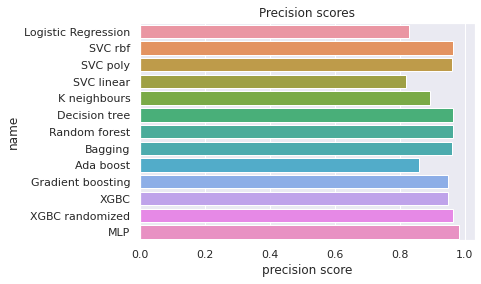

In [58]:
plt.title('Precision scores')
sns.barplot(data=df, x='precision score', y='name')

<AxesSubplot:title={'center':'Recall scores'}, xlabel='recall score', ylabel='name'>

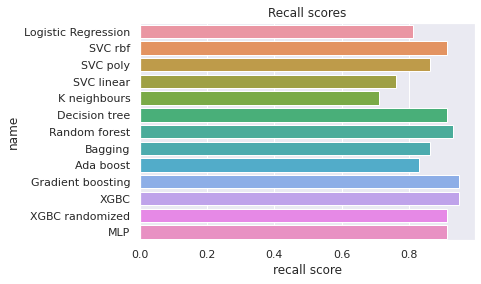

In [59]:
plt.title('Recall scores')
sns.barplot(data=df, x='recall score', y='name')

<AxesSubplot:title={'center':'F1 scores'}, xlabel='f1 score', ylabel='name'>

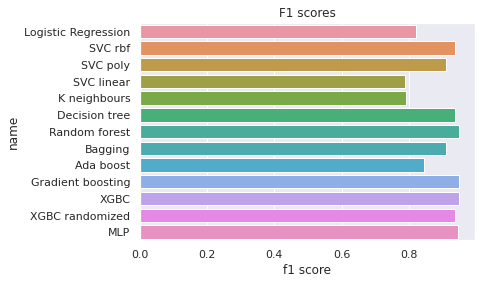

In [60]:
plt.title('F1 scores')
sns.barplot(data=df, x='f1 score', y='name')

<AxesSubplot:title={'center':'Accuracy scores'}, xlabel='accuracy score', ylabel='name'>

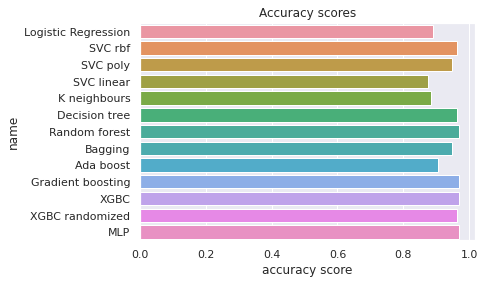

In [61]:
plt.title('Accuracy scores')
sns.barplot(data=df, x='accuracy score', y='name')

## Building models

In [62]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation

from keras.callbacks import History, EarlyStopping

In [63]:
from sklearn.model_selection import train_test_split

X = data.loc[:, data.columns != "Diabetic"]
y = data["Diabetic"]

X_train, X_test_full, y_train, y_test_full = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_test_full, y_test_full, test_size=0.5, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_valid.shape, y_valid.shape)

(570, 17) (570,)
(190, 17) (190,)
(191, 17) (191,)


In [64]:
early_stopping = EarlyStopping(monitor='val_loss', patience=25, mode='min')

scaler = StandardScaler()
scaler.fit(X)

X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)

activation_function = ["sigmoid", "tanh", "relu", "elu", "LeakyReLU"]
histories = []
eval_scores = []
acc_scores = []

for af in activation_function:
    model = Sequential()
    model.add(Dense(100,activation=af,input_shape=(X_train.shape[1],)))
    model.add(Dense(50,activation=af))
    model.add(Dense(10,activation=af))
    model.add(Dense(1,activation="sigmoid"))
    model.summary()

    model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

    history = model.fit(X_train, 
                        y_train,
                        validation_data = (X_valid, y_valid),
                        batch_size=32, 
                        epochs=250, 
                        callbacks=[early_stopping])
    histories.append(history)
    
    eval_scores.append(model.evaluate(X_test, y_test))

    predict_x = model.predict(X_test)
    y_pred = [0 if x < 0.5 else 1 for x in predict_x]
    
    acc_scores.append(metrics.accuracy_score(y_true = y_test, y_pred = y_pred ))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1800      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 7,371
Trainable params: 7,371
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250


2022-06-24 00:21:56.129120: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-24 00:21:56.129544: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-24 00:21:56.129588: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-06-24 00:21:56.129626: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-06-24 00:21:56.130860: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

18/18 [==============================] - 0s 7ms/step - loss: 0.5882 - accuracy: 0.7246 - val_loss: 0.6026 - val_accuracy: 0.7016
Epoch 2/250
18/18 [==============================] - 0s 2ms/step - loss: 0.5777 - accuracy: 0.7246 - val_loss: 0.5924 - val_accuracy: 0.7016
Epoch 3/250
18/18 [==============================] - 0s 2ms/step - loss: 0.5659 - accuracy: 0.7246 - val_loss: 0.5726 - val_accuracy: 0.7016
Epoch 4/250
18/18 [==============================] - 0s 2ms/step - loss: 0.5491 - accuracy: 0.7246 - val_loss: 0.5446 - val_accuracy: 0.7016
Epoch 5/250
18/18 [==============================] - 0s 2ms/step - loss: 0.5201 - accuracy: 0.7246 - val_loss: 0.5075 - val_accuracy: 0.7016
Epoch 6/250
18/18 [==============================] - 0s 2ms/step - loss: 0.4823 - accuracy: 0.7561 - val_loss: 0.4633 - val_accuracy: 0.7853
Epoch 7/250
18/18 [==============================] - 0s 2ms/step - loss: 0.4434 - accuracy: 0.7965 - val_loss: 0.4258 - val_accuracy: 0.8010
Epoch 8/250
18/18 [======

Trainable params: 7,371
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
18/18 [==============================] - 0s 6ms/step - loss: 0.5331 - accuracy: 0.7649 - val_loss: 0.4270 - val_accuracy: 0.8325
Epoch 2/250
18/18 [==============================] - 0s 2ms/step - loss: 0.3892 - accuracy: 0.8561 - val_loss: 0.3514 - val_accuracy: 0.8639
Epoch 3/250
18/18 [==============================] - 0s 2ms/step - loss: 0.3324 - accuracy: 0.8772 - val_loss: 0.3033 - val_accuracy: 0.8796
Epoch 4/250
18/18 [==============================] - 0s 2ms/step - loss: 0.2943 - accuracy: 0.8860 - val_loss: 0.2827 - val_accuracy: 0.8848
Epoch 5/250
18/18 [==============================] - 0s 2ms/step - loss: 0.2756 - accuracy: 0.8895 - val_loss: 0.2653 - val_accuracy: 0.8848
Epoch 6/250
18/18 [==============================] - 0s 2ms/step - loss: 0.2591 - accuracy: 0.8930 - val_loss: 0.2561 - val_accuracy: 0.8796
Epoch 7/250
18/18 [=====================

Epoch 58/250
18/18 [==============================] - 0s 2ms/step - loss: 0.0666 - accuracy: 0.9737 - val_loss: 0.1942 - val_accuracy: 0.9424
Epoch 59/250
18/18 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9737 - val_loss: 0.1944 - val_accuracy: 0.9424
Epoch 60/250
18/18 [==============================] - 0s 2ms/step - loss: 0.0636 - accuracy: 0.9702 - val_loss: 0.1893 - val_accuracy: 0.9424
Epoch 61/250
18/18 [==============================] - 0s 2ms/step - loss: 0.0650 - accuracy: 0.9719 - val_loss: 0.1952 - val_accuracy: 0.9372
Epoch 62/250
18/18 [==============================] - 0s 2ms/step - loss: 0.0662 - accuracy: 0.9754 - val_loss: 0.1950 - val_accuracy: 0.9424
Epoch 63/250
18/18 [==============================] - 0s 2ms/step - loss: 0.0603 - accuracy: 0.9737 - val_loss: 0.1922 - val_accuracy: 0.9424
Epoch 64/250
18/18 [==============================] - 0s 2ms/step - loss: 0.0608 - accuracy: 0.9754 - val_loss: 0.2011 - val_accuracy: 0.9372
Epoch 

 dense_18 (Dense)            (None, 10)                510       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 7,371
Trainable params: 7,371
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
18/18 [==============================] - 0s 6ms/step - loss: 0.6121 - accuracy: 0.7491 - val_loss: 0.5147 - val_accuracy: 0.8639
Epoch 2/250
18/18 [==============================] - 0s 2ms/step - loss: 0.4387 - accuracy: 0.8632 - val_loss: 0.3686 - val_accuracy: 0.8953
Epoch 3/250
18/18 [==============================] - 0s 2ms/step - loss: 0.3207 - accuracy: 0.8807 - val_loss: 0.2959 - val_accuracy: 0.9005
Epoch 4/250
18/18 [==============================] - 0s 2ms/step - loss: 0.2661 - accuracy: 0.8860 - val_loss: 0.2692 - val_accuracy: 0.9058
Epoch 5/250
18/18 [===================

sigmoid
[0.3555012047290802, 0.8368421196937561]
0.8368421052631579


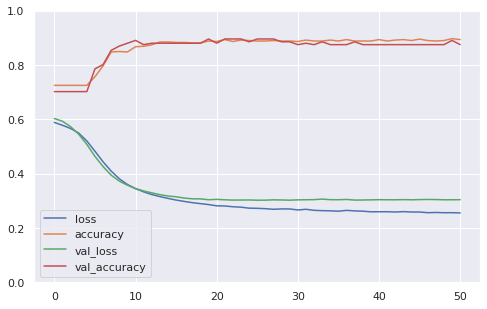

tanh
[0.14698277413845062, 0.9473684430122375]
0.9473684210526315


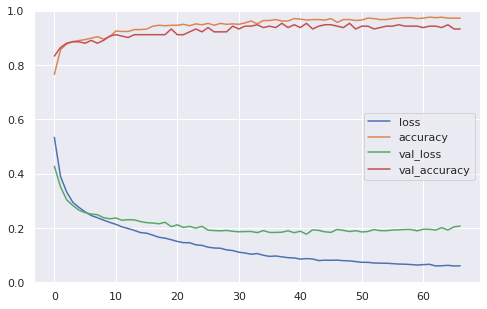

relu
[0.19010773301124573, 0.9473684430122375]
0.9473684210526315


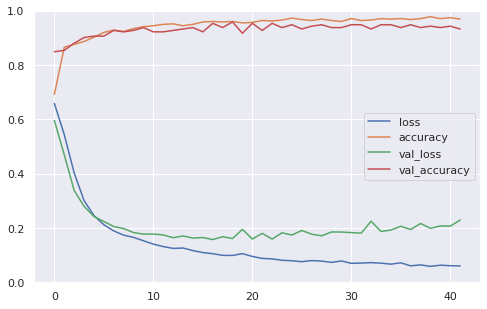

elu
[0.19403517246246338, 0.9578947424888611]
0.9578947368421052


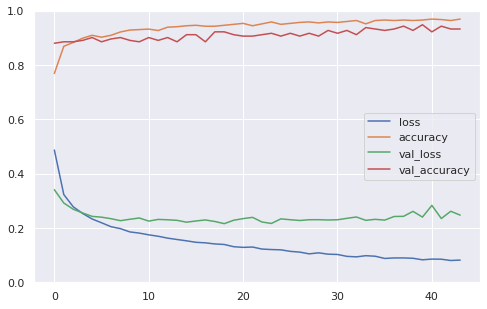

LeakyReLU
[0.20300477743148804, 0.9578947424888611]
0.9578947368421052


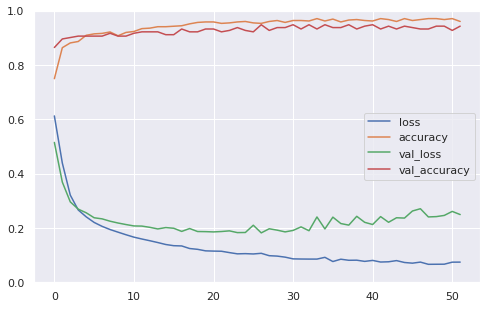

In [65]:
for history, name, eval_score, acc_score in zip(histories, activation_function, eval_scores, acc_scores):
    print(name)
    print(eval_score)
    print(acc_score)
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

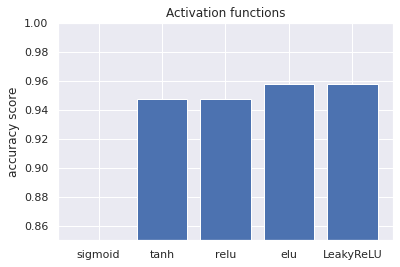

In [66]:
y_pos = np.arange(len(activation_function))
plt.bar(y_pos, acc_scores, align='center')
plt.xticks(y_pos, activation_function)
plt.ylabel('accuracy score')
plt.title('Activation functions')
plt.gca().set_ylim(0.85, 1)

plt.show()

In [67]:
model = Sequential()
model.add(Dense(100, use_bias=False, input_shape=(X_train.shape[1],)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(50, use_bias=False))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(10, use_bias=False))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 100)               1700      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_21 (Dense)            (None, 50)                5000      
                                                                 
 activation_1 (Activation)   (None, 50)                0         
                                                      

In [68]:
early_stopping = EarlyStopping(monitor='val_loss', patience=50, mode='min')

model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

history = model.fit(X_train, 
                    y_train,
                    validation_data = (X_valid, y_valid),
                    batch_size=32, 
                    epochs=1000, 
                    callbacks=[early_stopping])

Epoch 1/1000
18/18 [==============================] - 1s 8ms/step - loss: 0.7738 - accuracy: 0.6000 - val_loss: 0.6005 - val_accuracy: 0.7958
Epoch 2/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.7200 - accuracy: 0.6351 - val_loss: 0.5366 - val_accuracy: 0.8325
Epoch 3/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.6234 - accuracy: 0.7088 - val_loss: 0.4864 - val_accuracy: 0.8482
Epoch 4/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.5614 - accuracy: 0.7386 - val_loss: 0.4453 - val_accuracy: 0.8534
Epoch 5/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.5251 - accuracy: 0.7509 - val_loss: 0.4174 - val_accuracy: 0.8534
Epoch 6/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4924 - accuracy: 0.7860 - val_loss: 0.3983 - val_accuracy: 0.8691
Epoch 7/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4581 - accuracy: 0.8246 - val_loss: 0.3754 - val_accuracy: 0.8639
Epoch 

18/18 [==============================] - 0s 2ms/step - loss: 0.1532 - accuracy: 0.9386 - val_loss: 0.1598 - val_accuracy: 0.9424
Epoch 116/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1621 - accuracy: 0.9474 - val_loss: 0.1685 - val_accuracy: 0.9424
Epoch 117/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1876 - accuracy: 0.9246 - val_loss: 0.1795 - val_accuracy: 0.9319
Epoch 118/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1895 - accuracy: 0.9298 - val_loss: 0.1809 - val_accuracy: 0.9319
Epoch 119/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1951 - accuracy: 0.9211 - val_loss: 0.1723 - val_accuracy: 0.9424
Epoch 120/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1588 - accuracy: 0.9281 - val_loss: 0.1703 - val_accuracy: 0.9424
Epoch 121/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1545 - accuracy: 0.9351 - val_loss: 0.1705 - val_accuracy: 0.9267
Epoch 1

In [69]:
print(model.evaluate(X_test, y_test))

predict_x = model.predict(X_test)
y_pred = [0 if x < 0.5 else 1 for x in predict_x]

acc_score = metrics.accuracy_score(y_true = y_test, y_pred = y_pred )
    
print(acc_score)

activation_function.append('r_n_d')
acc_scores.append(acc_score)

6/6 [==============================] - 0s 794us/step - loss: 0.1378 - accuracy: 0.9632
[0.13777709007263184, 0.9631578922271729]
6/6 [==============================] - 0s 1ms/step
0.9631578947368421


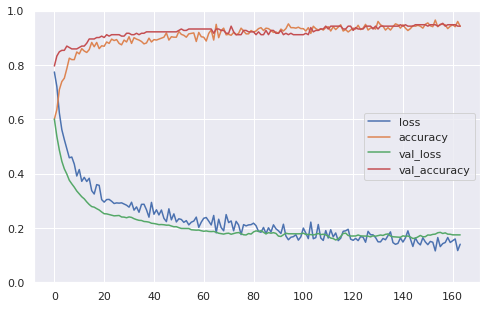

In [70]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [71]:
model = Sequential()
model.add(Dense(100, use_bias=False, input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.4))
model.add(Dense(50, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.4))
model.add(Dense(10, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.4))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 100)               1700      
                                                                 
 batch_normalization_3 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 100)               0         
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_25 (Dense)            (None, 50)                5000      
                                                                 
 batch_normalization_4 (Batc  (None, 50)               200       
 hNormalization)                                      

In [72]:
early_stopping = EarlyStopping(monitor='val_loss', patience=50, mode='min')

model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

history = model.fit(X_train, 
                    y_train,
                    validation_data = (X_valid, y_valid),
                    batch_size=32, 
                    epochs=1000, 
                    callbacks=[early_stopping])

Epoch 1/1000
18/18 [==============================] - 1s 8ms/step - loss: 0.8370 - accuracy: 0.4211 - val_loss: 0.6802 - val_accuracy: 0.5602
Epoch 2/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.7435 - accuracy: 0.4754 - val_loss: 0.6389 - val_accuracy: 0.7120
Epoch 3/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.7041 - accuracy: 0.5456 - val_loss: 0.6117 - val_accuracy: 0.7853
Epoch 4/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.6250 - accuracy: 0.6632 - val_loss: 0.5905 - val_accuracy: 0.8168
Epoch 5/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6003 - accuracy: 0.7000 - val_loss: 0.5675 - val_accuracy: 0.8325
Epoch 6/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.5674 - accuracy: 0.7561 - val_loss: 0.5407 - val_accuracy: 0.8429
Epoch 7/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.5448 - accuracy: 0.7579 - val_loss: 0.5139 - val_accuracy: 0.8639
Epoch 

18/18 [==============================] - 0s 2ms/step - loss: 0.2166 - accuracy: 0.9088 - val_loss: 0.1759 - val_accuracy: 0.9424
Epoch 116/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2202 - accuracy: 0.9123 - val_loss: 0.1831 - val_accuracy: 0.9319
Epoch 117/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1700 - accuracy: 0.9351 - val_loss: 0.1860 - val_accuracy: 0.9319
Epoch 118/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1723 - accuracy: 0.9509 - val_loss: 0.1858 - val_accuracy: 0.9319
Epoch 119/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1868 - accuracy: 0.9439 - val_loss: 0.1858 - val_accuracy: 0.9319
Epoch 120/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1786 - accuracy: 0.9263 - val_loss: 0.1860 - val_accuracy: 0.9372
Epoch 121/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2080 - accuracy: 0.9193 - val_loss: 0.1853 - val_accuracy: 0.9319
Epoch 1

Epoch 172/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1714 - accuracy: 0.9228 - val_loss: 0.1888 - val_accuracy: 0.9476
Epoch 173/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1479 - accuracy: 0.9386 - val_loss: 0.1874 - val_accuracy: 0.9476
Epoch 174/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1638 - accuracy: 0.9351 - val_loss: 0.1887 - val_accuracy: 0.9476
Epoch 175/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1725 - accuracy: 0.9316 - val_loss: 0.1897 - val_accuracy: 0.9529
Epoch 176/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1708 - accuracy: 0.9421 - val_loss: 0.1906 - val_accuracy: 0.9476
Epoch 177/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1626 - accuracy: 0.9456 - val_loss: 0.1839 - val_accuracy: 0.9476
Epoch 178/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1319 - accuracy: 0.9474 - val_loss: 0.1875 - val_accuracy:

In [73]:
print(model.evaluate(X_test, y_test))

predict_x = model.predict(X_test)
y_pred = [0 if x < 0.5 else 1 for x in predict_x]

acc_score = metrics.accuracy_score(y_true = y_test, y_pred = y_pred )
    
print(acc_score)

activation_function.append('n_r_d')
acc_scores.append(acc_score)

6/6 [==============================] - 0s 861us/step - loss: 0.1673 - accuracy: 0.9474
[0.16727879643440247, 0.9473684430122375]
6/6 [==============================] - 0s 859us/step
0.9473684210526315


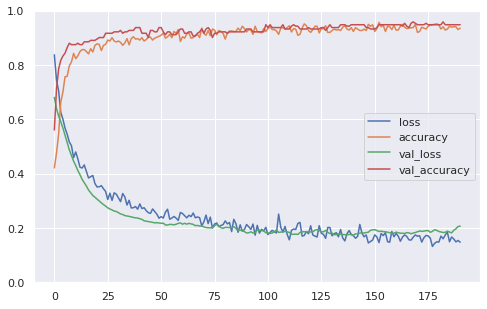

In [74]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

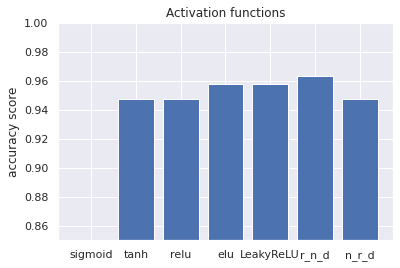

In [75]:
y_pos = np.arange(len(activation_function))
plt.bar(y_pos, acc_scores, align='center')
plt.xticks(y_pos, activation_function)
plt.ylabel('accuracy score')
plt.title('Activation functions')
plt.gca().set_ylim(0.85, 1)

plt.show()

In [76]:
from keras.wrappers.scikit_learn import KerasClassifier

In [77]:
def create_model(optimizer='Adam', dropout_rate=0.4, activation='relu'):
    model = Sequential()
    model.add(Dense(100, use_bias=False, input_shape=(X_train.shape[1],)))
    model.add(Activation(activation))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(50, use_bias=False))
    model.add(Activation(activation))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, use_bias=False))
    model.add(Activation(activation))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation="sigmoid"))
    model.summary()
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) 
    return model

In [78]:
param_grid = {
    'optimizer': ['rmsprop', 'adam'],
    'dropout_rate': [0.2, 0.4],
    'activation': ['relu', 'tanh']
}

model = KerasClassifier(build_fn=create_model)

grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid, 
                    return_train_score=True)

grid_result = grid.fit(X_train, y_train)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 100)               1700      
                                                                 
 activation_6 (Activation)   (None, 100)               0         
                                                                 
 batch_normalization_6 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_29 (Dense)            (None, 50)                5000      
                                                                 
 activation_7 (Activation)   (None, 50)                0         
                                                      

                                                                 
 batch_normalization_15 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 dropout_15 (Dropout)        (None, 100)               0         
                                                                 
 dense_41 (Dense)            (None, 50)                5000      
                                                                 
 activation_16 (Activation)  (None, 50)                0         
                                                                 
 batch_normalization_16 (Bat  (None, 50)               200       
 chNormalization)                                                
                                                                 
 dropout_16 (Dropout)        (None, 50)                0         
                                                                 
 dense_42 

                                                                 
 activation_25 (Activation)  (None, 50)                0         
                                                                 
 batch_normalization_25 (Bat  (None, 50)               200       
 chNormalization)                                                
                                                                 
 dropout_25 (Dropout)        (None, 50)                0         
                                                                 
 dense_54 (Dense)            (None, 10)                500       
                                                                 
 activation_26 (Activation)  (None, 10)                0         
                                                                 
 batch_normalization_26 (Bat  (None, 10)               40        
 chNormalization)                                                
                                                                 
 dropout_2

 dropout_34 (Dropout)        (None, 50)                0         
                                                                 
 dense_66 (Dense)            (None, 10)                500       
                                                                 
 activation_35 (Activation)  (None, 10)                0         
                                                                 
 batch_normalization_35 (Bat  (None, 10)               40        
 chNormalization)                                                
                                                                 
 dropout_35 (Dropout)        (None, 10)                0         
                                                                 
 dense_67 (Dense)            (None, 1)                 11        
                                                                 
Total params: 7,851
Trainable params: 7,531
Non-trainable params: 320
_________________________________________________________________
15/15 

 chNormalization)                                                
                                                                 
 dropout_44 (Dropout)        (None, 10)                0         
                                                                 
 dense_79 (Dense)            (None, 1)                 11        
                                                                 
Total params: 7,851
Trainable params: 7,531
Non-trainable params: 320
_________________________________________________________________
15/15 [==============================] - 0s 786us/step - loss: 0.6079 - accuracy: 0.7412
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 100)               1700      
                                                                 
 activation_45 (Activation)  (None, 100)               0         
                          

Total params: 7,851
Trainable params: 7,531
Non-trainable params: 320
_________________________________________________________________
15/15 [==============================] - 0s 829us/step - loss: 0.6636 - accuracy: 0.5833
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_92 (Dense)            (None, 100)               1700      
                                                                 
 activation_54 (Activation)  (None, 100)               0         
                                                                 
 batch_normalization_54 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 dropout_54 (Dropout)        (None, 100)               0         
                                                                 
 dense_93 (Dense)         

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_104 (Dense)           (None, 100)               1700      
                                                                 
 activation_63 (Activation)  (None, 100)               0         
                                                                 
 batch_normalization_63 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 dropout_63 (Dropout)        (None, 100)               0         
                                                                 
 dense_105 (Dense)           (None, 50)                5000      
                                                                 
 activation_64 (Activation)  (None, 50)                0         
                                                     

                                                                 
 batch_normalization_72 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 dropout_72 (Dropout)        (None, 100)               0         
                                                                 
 dense_117 (Dense)           (None, 50)                5000      
                                                                 
 activation_73 (Activation)  (None, 50)                0         
                                                                 
 batch_normalization_73 (Bat  (None, 50)               200       
 chNormalization)                                                
                                                                 
 dropout_73 (Dropout)        (None, 50)                0         
                                                                 
 dense_118

                                                                 
 activation_82 (Activation)  (None, 50)                0         
                                                                 
 batch_normalization_82 (Bat  (None, 50)               200       
 chNormalization)                                                
                                                                 
 dropout_82 (Dropout)        (None, 50)                0         
                                                                 
 dense_130 (Dense)           (None, 10)                500       
                                                                 
 activation_83 (Activation)  (None, 10)                0         
                                                                 
 batch_normalization_83 (Bat  (None, 10)               40        
 chNormalization)                                                
                                                                 
 dropout_8

                                                                 
 dense_142 (Dense)           (None, 10)                500       
                                                                 
 activation_92 (Activation)  (None, 10)                0         
                                                                 
 batch_normalization_92 (Bat  (None, 10)               40        
 chNormalization)                                                
                                                                 
 dropout_92 (Dropout)        (None, 10)                0         
                                                                 
 dense_143 (Dense)           (None, 1)                 11        
                                                                 
Total params: 7,851
Trainable params: 7,531
Non-trainable params: 320
_________________________________________________________________
15/15 [==============================] - 0s 835us/step - loss: 0.5186 - 

                                                                 
 dropout_101 (Dropout)       (None, 10)                0         
                                                                 
 dense_155 (Dense)           (None, 1)                 11        
                                                                 
Total params: 7,851
Trainable params: 7,531
Non-trainable params: 320
_________________________________________________________________
15/15 [==============================] - 0s 901us/step - loss: 0.4978 - accuracy: 0.8070
Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_156 (Dense)           (None, 100)               1700      
                                                                 
 activation_102 (Activation)  (None, 100)              0         
                                                                 
 batch_normalization_102 (

Trainable params: 7,531
Non-trainable params: 320
_________________________________________________________________
15/15 [==============================] - 0s 862us/step - loss: 0.5221 - accuracy: 0.7961
Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_168 (Dense)           (None, 100)               1700      
                                                                 
 activation_111 (Activation)  (None, 100)              0         
                                                                 
 batch_normalization_111 (Ba  (None, 100)              400       
 tchNormalization)                                               
                                                                 
 dropout_111 (Dropout)       (None, 100)               0         
                                                                 
 dense_169 (Dense)           (None, 50)       

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_180 (Dense)           (None, 100)               1700      
                                                                 
 activation_120 (Activation)  (None, 100)              0         
                                                                 
 batch_normalization_120 (Ba  (None, 100)              400       
 tchNormalization)                                               
                                                                 
 dropout_120 (Dropout)       (None, 100)               0         
                                                                 
 dense_181 (Dense)           (None, 50)                5000      
                                                                 
 activation_121 (Activation)  (None, 50)               0         
                                                                 
 batch_nor

In [79]:
grid_result.best_params_

{'activation': 'tanh', 'dropout_rate': 0.2, 'optimizer': 'rmsprop'}

In [80]:
model = create_model(**grid_result.best_params_)

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_192 (Dense)           (None, 100)               1700      
                                                                 
 activation_129 (Activation)  (None, 100)              0         
                                                                 
 batch_normalization_129 (Ba  (None, 100)              400       
 tchNormalization)                                               
                                                                 
 dropout_129 (Dropout)       (None, 100)               0         
                                                                 
 dense_193 (Dense)           (None, 50)                5000      
                                                                 
 activation_130 (Activation)  (None, 50)               0         
                                                     

In [81]:
modelsearly_stopping = EarlyStopping(monitor='val_loss', patience=50, mode='min')

history = model.fit(X_train, 
                    y_train,
                    validation_data = (X_valid, y_valid),
                    batch_size=32, 
                    epochs=1000, 
                    callbacks=[early_stopping])

Epoch 1/1000
18/18 [==============================] - 1s 8ms/step - loss: 0.7152 - accuracy: 0.6263 - val_loss: 0.4288 - val_accuracy: 0.8586
Epoch 2/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.5234 - accuracy: 0.7649 - val_loss: 0.3787 - val_accuracy: 0.8586
Epoch 3/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4997 - accuracy: 0.7596 - val_loss: 0.3496 - val_accuracy: 0.8586
Epoch 4/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4852 - accuracy: 0.7912 - val_loss: 0.3331 - val_accuracy: 0.8953
Epoch 5/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4436 - accuracy: 0.8053 - val_loss: 0.3135 - val_accuracy: 0.8848
Epoch 6/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4361 - accuracy: 0.8000 - val_loss: 0.3041 - val_accuracy: 0.8848
Epoch 7/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4062 - accuracy: 0.8211 - val_loss: 0.2891 - val_accuracy: 0.9162
Epoch 

18/18 [==============================] - 0s 2ms/step - loss: 0.1322 - accuracy: 0.9439 - val_loss: 0.1870 - val_accuracy: 0.9424
Epoch 116/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1283 - accuracy: 0.9526 - val_loss: 0.2005 - val_accuracy: 0.9267
Epoch 117/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1127 - accuracy: 0.9596 - val_loss: 0.1944 - val_accuracy: 0.9267
Epoch 118/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1543 - accuracy: 0.9404 - val_loss: 0.1969 - val_accuracy: 0.9267
Epoch 119/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1516 - accuracy: 0.9404 - val_loss: 0.1931 - val_accuracy: 0.9319
Epoch 120/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1325 - accuracy: 0.9474 - val_loss: 0.1959 - val_accuracy: 0.9372
Epoch 121/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1190 - accuracy: 0.9561 - val_loss: 0.1964 - val_accuracy: 0.9319
Epoch 1

In [82]:
print(model.evaluate(X_test, y_test))

predict_x = model.predict(X_test)
y_pred = [0 if x < 0.5 else 1 for x in predict_x]

acc_score = metrics.accuracy_score(y_true = y_test, y_pred = y_pred )
    
print(acc_score)

activation_function.append('grid')
acc_scores.append(acc_score)

6/6 [==============================] - 0s 737us/step - loss: 0.1435 - accuracy: 0.9632
[0.1434817910194397, 0.9631578922271729]
6/6 [==============================] - 0s 939us/step
0.9631578947368421


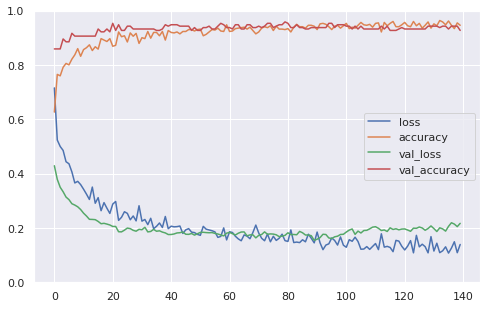

In [83]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

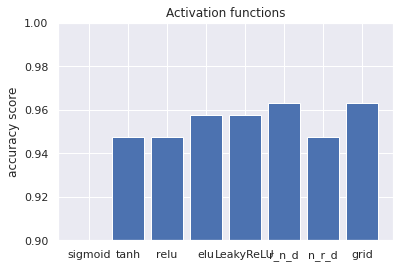

In [84]:
y_pos = np.arange(len(activation_function))
plt.bar(y_pos, acc_scores, align='center')
plt.xticks(y_pos, activation_function)
plt.ylabel('accuracy score')
plt.title('Activation functions')
plt.gca().set_ylim(0.9, 1)

plt.show()

## Summary

In [85]:
labels = np.concatenate((df['name'].values, np.array(activation_function)), axis=None)
scores = np.concatenate((df['accuracy score'].values, np.array(acc_scores)), axis=None)

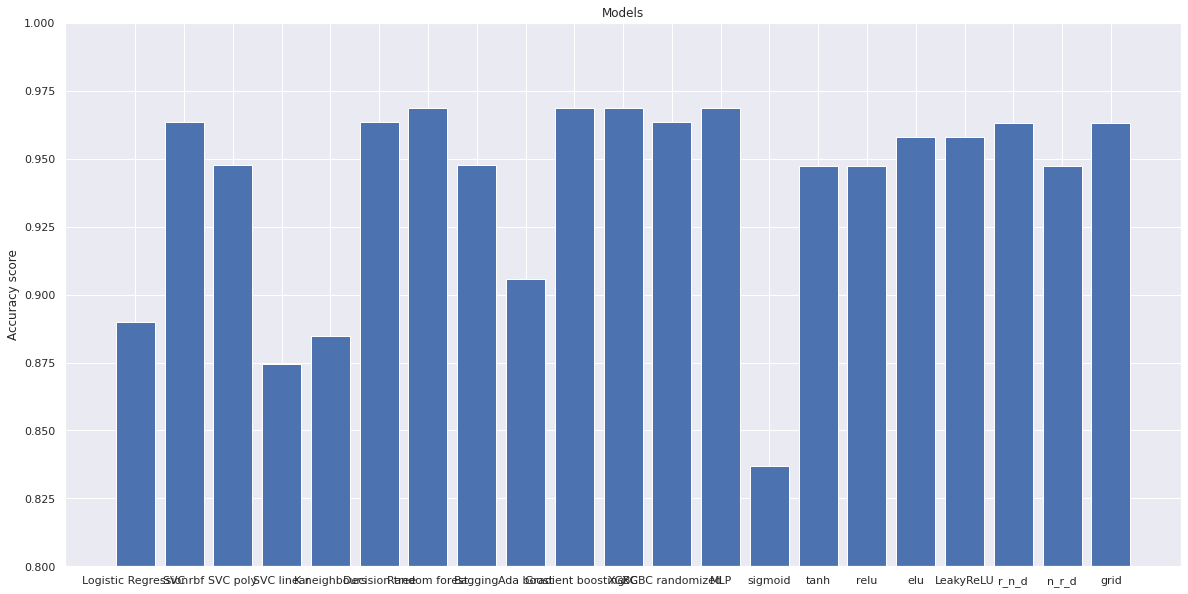

In [86]:
y_pos = np.arange(len(labels))
plt.figure(figsize=(20,10))
plt.bar(y_pos, scores, align='center')
plt.xticks(y_pos, labels)
plt.ylabel('Accuracy score')
plt.title('Models')
plt.gca().set_ylim(0.8, 1)

plt.show()

It would seem that models like SVC rbf, decision tree, random forest, gradient boosting, XGBC, MLP all have higher accuracy scores than sequential keras models, although it is worth noting, most of those models took a longer time fitting.